## Loading of Libraries
### Load all the libraries to be used

In [1]:
import pandas as pd 
import numbers as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Loading of Datasets

In [2]:
df=pd.read_csv('Dataset//hospital_readmissions.csv')

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Data exploration 


In [3]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [5]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [15]:
df['age'].value_counts()

age
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: count, dtype: int64

In [6]:
print("The duplicated dataset is",df.duplicated().sum())

The duplicated dataset is 0


In [7]:
print("The shape of the dataset is:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


The shape of the dataset is: (25000, 17)
Number of rows: 25000
Number of columns: 17


# Data Preprocessing


In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Numerical Columns: Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')
Categorical Columns: Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


In [9]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if any(df[col] < lower_bound) or any(df[col] > upper_bound):
        print(f'Outliers detected in {col}')
    else:
        print(f'No outliers in {col}')


Outliers detected in time_in_hospital
Outliers detected in n_lab_procedures
Outliers detected in n_procedures
Outliers detected in n_medications
Outliers detected in n_outpatient
Outliers detected in n_inpatient
Outliers detected in n_emergency


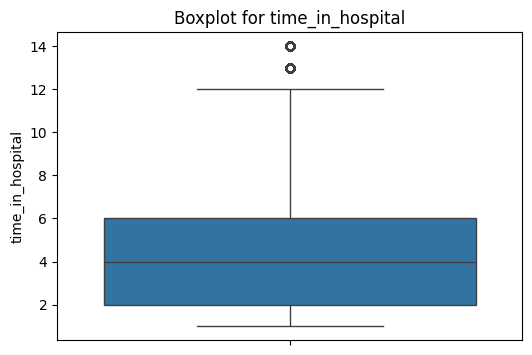

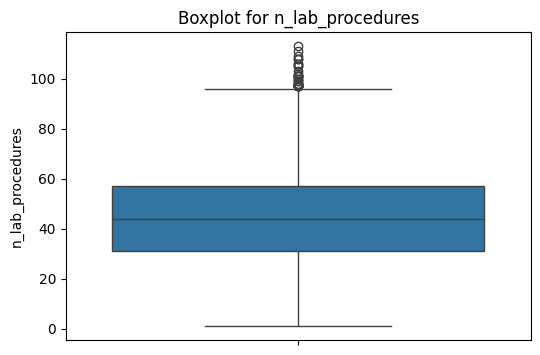

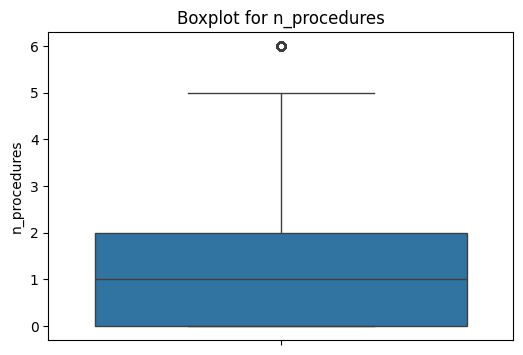

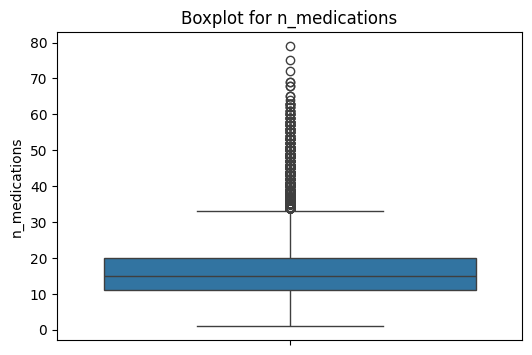

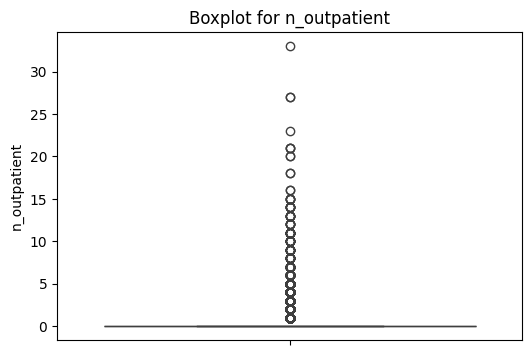

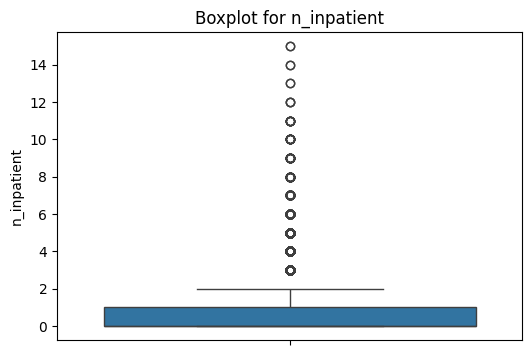

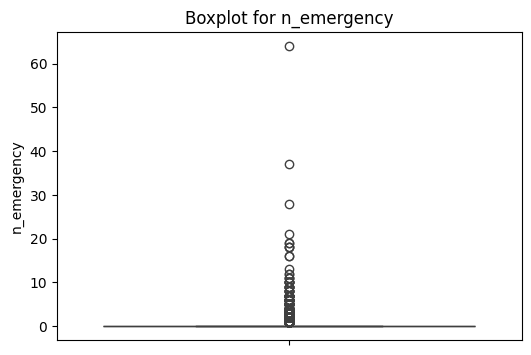

In [10]:

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:

# Loop through each column
for col in numerical_columns:
    # Calculate the IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers at the upper and lower bounds
    df[col] = np.where(
        df[col] > upper_bound, upper_bound,
        np.where(df[col] < lower_bound, lower_bound, df[col])
    )


In [13]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if any(df[col] < lower_bound) or any(df[col] > upper_bound):
        print(f'Outliers detected in {col}')
    else:
        print(f'No outliers in {col}')


No outliers in time_in_hospital
No outliers in n_lab_procedures
No outliers in n_procedures
No outliers in n_medications
No outliers in n_outpatient
No outliers in n_inpatient
No outliers in n_emergency
